# For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

# Has the network latency gone up since we switched internet service providers?

H0: There is not a significant difference in the network latency with different internet providers

H1: There is a significat increase in the network latency with different internet providers

type I error = I reject there is not a significant difference in the network latency with different internet providers but in reality there is not a significant

type II error = I fail to reject the null hypothesis (There is not a significant difference in the network latency with different internet providers) when it is actually false that means There is a significat increase in the network latency with different internet providers.

# Is the website redesign any good?

H0: the website redesign does not increase revenue

H1: :the website redesign increases revenue

type I error : I reject the null hypothesis( the website redesign does not increase revenue) but it is acually true

type II error: I fail to reject the null hypothesis (the website redesign does not increase revenue) but acually the website redesign increases revenue

# Is our television ad driving more sales?

H0: the television add does not change sales

H1: the television ad increases sales

type I error : I reject the null hypothesis (television ad increase sales), but, in reality television add does not change sales

type II error : I fail to reject the null hypothesis (television ad increase sales) when it is actually false.

# T-test exercises

In [85]:
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from pydataset import data

# Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

- H0: Mean days to sell for office 1 same as mean days to sell for office 2
- Ha: Mean days to sell for office 1 is difference in mean days to sell for office 2

In [13]:
#Two Samples

store_1 = 40
mean1 = 90
std1 = 15

store_2 = 50
mean2 = 100
std2 = 20

#Level of significance
α = 0.05

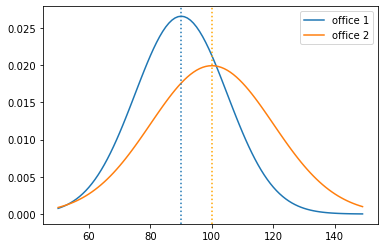

In [14]:
# Visualize two distribution:

x = np.arange(50,150)

y1 = stats.norm(mean1,std1).pdf(x)
y2 = stats.norm(mean2, std2).pdf(x)

plt.plot(x, y1, label = 'office 1')
plt.plot(x, y2, label = 'office 2')
plt.axvline(mean1, ls = ':')
plt.axvline(mean2, ls = ':', color = 'orange')

plt.legend()

In [8]:
t, p = stats.ttest_ind_from_stats(mean1, std1, store_1, mean2, std2, store_2, equal_var=False)
t, p

(-2.7091418459143854, 0.00811206270346016)

In [9]:
if p < α:
    print ("We reject the null hypothesis")
else:
    print ("We failed to reject the null hypothesis")

We reject the null hypothesis


# Load the mpg dataset and use it to answer the following questions:
# Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

- H0: There is not a difference in fuel-efficiency in cars from 2008 to 1999
- Ha: There is a significant difference in fuel-efficiency in cars from 2008 to 1999

In [3]:
# mpg = sns.load_dataset('mpg') this dataset is difference from pydataset
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [5]:
mpg["average_mileage"] = (mpg.hwy + mpg.cty) / 2
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [30]:
cars_2008 = mpg.average_mileage[mpg.year == 2008]
cars_1999 = mpg.average_mileage[mpg.year == 1999]

In [47]:
cars_1999.var(),cars_2008.var() # Variances comparason between 1999 and 2008 model

(27.122605363984682, 24.097480106100797)

In [46]:
cars_1999.mean(),cars_2008.mean()

(20.22222222222222, 20.076923076923077)

In [32]:
α = 0.05

In [45]:
t, p = stats.ttest_ind(cars_1999, cars_2008, equal_var=False)
t, p, α

(0.21960177245940962, 0.8263750772060638, 0.05)

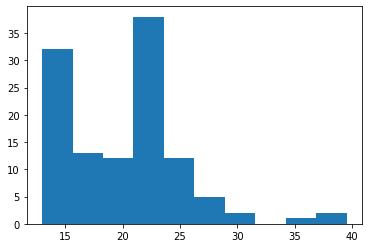

In [35]:
cars_1999.hist()
plt.grid(False)

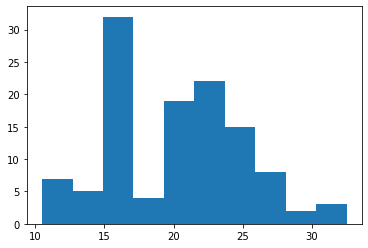

In [36]:
cars_2008.hist()
plt.grid(False)

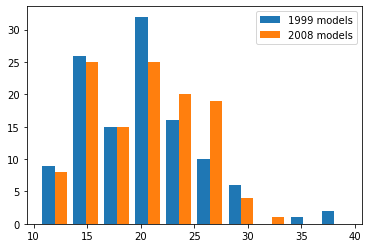

In [55]:
plt.hist([cars_1999, cars_2008], label = ["1999 models", "2008 models"])
plt.legend(loc='upper right')

In [56]:
if p < α:
    print ("We reject the null hypothesis")
else:
    print("We failed to reject the null hypothesis")

We failed to reject the null hypothesis


# Are compact cars more fuel-efficient than the average car?

- H0: There is not a difference in fuel-efficiency between compact cars and the average car
- Ha: Compact cars are more fuel-efficient than the average

In [57]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [6]:
compact = mpg.average_mileage[mpg["class"] == "compact"]

In [63]:
compact.shape

(47,)

In [8]:
average_car = mpg['average_mileage'].mean()

In [10]:
α =.05

In [12]:
t, p = stats.ttest_1samp(compact,average_car)
t, p/2, α

(7.896888573132535, 2.0992818971585668e-10, 0.05)

In [72]:
if (p/2 < α) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


# Do manual cars get better gas mileage than automatic cars?

- H0 = There is no difference in average gas mileage between manual and automatic trabsmission cars 
- Ha = the fuel-efficiency in manual cars are better than automatic transmission cars

In [75]:
manual_cars = mpg['average_mileage'][mpg.trans.str.contains('manual')]
auto_cars = mpg['average_mileage'][mpg.trans.str.contains('auto')]

In [81]:
α = 0.05

In [77]:
auto_cars.var(), manual_cars.var()

(21.942777233382337, 26.635167464114826)

In [83]:
t, p = stats.ttest_ind(manual_cars, auto_cars)
t, p/2, α

(4.593437735750014, 3.5771872005728416e-06, 0.05)

In [84]:
if (p/2 < α) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


# Correlation


In [87]:
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from pydataset import data
from env import user_name, password, host, url, get_db_url

- Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

In [15]:
telco_df = pd.read_csv('CustDetails.csv')

In [16]:
telco_df.head(3)

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,partner_dependents,tenure,average_monthly,phone_services_description,internet_services_description,contact_type_description,tenure_month,service_types,tenure_years,Auto or Non-Auto
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,...,3,9.044207,65.52114676,One Line,DSL,1 Year,9,Phone and Internet,< 1 year,Non-Auto
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,...,0,9.055092,142.7215952,Two or More Lines,DSL,Month-to-Month,9,Phone and Internet,< 1 year,Non-Auto
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,...,0,3.800406,22.23476189,One Line,Fiber Optic,Month-to-Month,4,Phone and Internet,< 1 year,Non-Auto


In [17]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_id                    7049 non-null   object 
 1   gender                         7049 non-null   object 
 2   is_senior_citizen              7049 non-null   int64  
 3   partner                        7049 non-null   object 
 4   dependents                     7049 non-null   object 
 5   phone_service                  7049 non-null   int64  
 6   internet_service               7049 non-null   int64  
 7   contract_type                  7049 non-null   int64  
 8   payment_type                   7049 non-null   object 
 9   monthly_charges                7049 non-null   float64
 10  total_charges                  7038 non-null   float64
 11  churn                          7049 non-null   object 
 12  is_female                      7049 non-null   b

In [18]:
telco_df[telco_df.isna().any(axis=1)]

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,partner_dependents,tenure,average_monthly,phone_services_description,internet_services_description,contact_type_description,tenure_month,service_types,tenure_years,Auto or Non-Auto
945,1371-DWPAZ,Female,0,Yes,Yes,0,1,2,Credit card (automatic),56.05,...,3,0.0,0,No Phone Service,DSL,2 Year,0,Internet,< 1 year,Auto
1731,2520-SGTTA,Female,0,Yes,Yes,1,0,2,Mailed check,20.00,...,3,0.0,0,One Line,No Internet Service,2 Year,0,Phone,< 1 year,Non-Auto
1906,2775-SEFEE,Male,0,No,Yes,2,1,2,Bank transfer (automatic),61.90,...,2,0.0,0,Two or More Lines,DSL,2 Year,0,Phone and Internet,< 1 year,Auto
2025,2923-ARZLG,Male,0,Yes,Yes,1,0,1,Mailed check,19.70,...,3,0.0,0,One Line,No Internet Service,1 Year,0,Phone,< 1 year,Non-Auto
2176,3115-CZMZD,Male,0,No,Yes,1,0,2,Mailed check,20.25,...,2,0.0,0,One Line,No Internet Service,2 Year,0,Phone,< 1 year,Non-Auto
2250,3213-VVOLG,Male,0,Yes,Yes,2,0,2,Mailed check,25.35,...,3,0.0,0,Two or More Lines,No Internet Service,2 Year,0,Phone,< 1 year,Non-Auto
2855,4075-WKNIU,Female,0,Yes,Yes,2,1,2,Mailed check,73.35,...,3,0.0,0,Two or More Lines,DSL,2 Year,0,Phone and Internet,< 1 year,Non-Auto
3052,4367-NUYAO,Male,0,Yes,Yes,2,0,2,Mailed check,25.75,...,3,0.0,0,Two or More Lines,No Internet Service,2 Year,0,Phone,< 1 year,Non-Auto
3118,4472-LVYGI,Female,0,Yes,Yes,0,1,2,Bank transfer (automatic),52.55,...,3,0.0,0,No Phone Service,DSL,2 Year,0,Internet,< 1 year,Auto
4054,5709-LVOEQ,Female,0,Yes,Yes,1,1,2,Mailed check,80.85,...,3,0.0,0,One Line,DSL,2 Year,0,Phone and Internet,< 1 year,Non-Auto


In [20]:
telco_df = telco_df.dropna()
telco_df

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,partner_dependents,tenure,average_monthly,phone_services_description,internet_services_description,contact_type_description,tenure_month,service_types,tenure_years,Auto or Non-Auto
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.60,...,3,9.044207,65.52114676,One Line,DSL,1 Year,9,Phone and Internet,< 1 year,Non-Auto
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.90,...,0,9.055092,142.7215952,Two or More Lines,DSL,Month-to-Month,9,Phone and Internet,< 1 year,Non-Auto
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.90,...,0,3.800406,22.23476189,One Line,Fiber Optic,Month-to-Month,4,Phone and Internet,< 1 year,Non-Auto
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.00,...,1,12.631122,388.3904824,One Line,Fiber Optic,Month-to-Month,13,Phone and Internet,2 years,Non-Auto
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.90,...,1,3.187128,32.47451221,One Line,Fiber Optic,Month-to-Month,3,Phone and Internet,< 1 year,Non-Auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,9987-LUTYD,Female,0,No,No,1,1,1,Mailed check,55.15,...,0,13.470535,33.74114853,One Line,DSL,1 Year,13,Phone and Internet,2 years,Non-Auto
7045,9992-RRAMN,Male,0,Yes,No,2,2,0,Electronic check,85.10,...,1,22.017626,1016.141348,Two or More Lines,Fiber Optic,Month-to-Month,22,Phone and Internet,2 years,Non-Auto
7046,9992-UJOEL,Male,0,No,No,1,1,0,Mailed check,50.30,...,0,1.843936,1.359888388,One Line,DSL,Month-to-Month,2,Phone and Internet,< 1 year,Non-Auto
7047,9993-LHIEB,Male,0,Yes,Yes,1,1,2,Mailed check,67.85,...,3,68.204127,73.64099417,One Line,DSL,2 Year,68,Phone and Internet,5 years,Non-Auto


In [21]:
telco_df.shape

(7038, 27)

In [22]:
x = telco_df['tenure']
y = telco_df['monthly_charges']

In [23]:
r, p = stats.pearsonr(x,y)
r, p

(0.2461667830592631, 1.1952280772800575e-97)

Text(0, 0.5, 'MonthlyCharges')

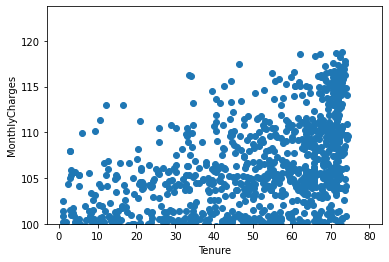

In [32]:
plt.scatter(x,y)
plt.ylim(100)
plt.xlabel('Tenure')
plt.ylabel('MonthlyCharges')
#Weak correlation between tenure and monthly charges

In [33]:
# Tenure and Total Charges
y_2 = telco_df['total_charges']

In [35]:
r, p = stats.pearsonr(x,y_2)
r, p

(0.8258274352556676, 0.0)

Text(0, 0.5, 'total_charges')

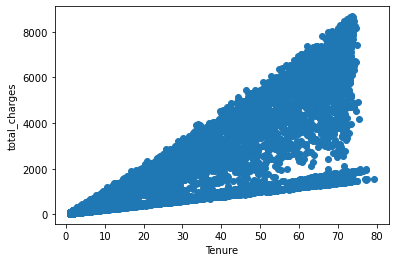

In [40]:
plt.scatter(x,y_2)
plt.xlabel('Tenure')
plt.ylabel('total_charges')
#Strong correlation between tenure and total charges

In [69]:
#Control for phone and internet service?
x_has_phone_te = telco_df['tenure'].where(telco_df['phone_services_description'] == 'No Phone Service')
y_has_phone_mc = telco_df['monthly_charges'].where(telco_df['phone_services_description'] ==  'No Phone Service')

In [75]:
new_x =x_has_phone_te.dropna()
new_y =y_has_phone_mc.dropna()

In [76]:
r, p = stats.pearsonr(new_x, new_y)
r, p

(0.5929000576223008, 7.050238802215818e-66)

Text(0, 0.5, 'Montlhy Charges')

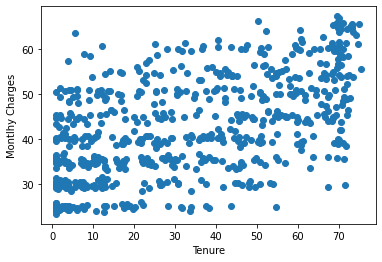

In [77]:
plt.scatter( new_x , new_y)
plt.xlabel('Tenure')
plt.ylabel('Montlhy Charges')
#Still a weak correlation but an improvement

In [78]:
# Control tenure and internet services?
x_has_internet_te = telco_df['tenure'].where(telco_df['internet_services_description'] == 'No Internet Service')
y_has_internet_mc = telco_df['monthly_charges'].where(telco_df['internet_services_description'] ==  'No Internet Service')

In [79]:
new_x_2 = x_has_internet_te.dropna()
new_y_2 = y_has_internet_mc.dropna()

In [81]:
r, p = stats.pearsonr(new_x_2, new_y_2)
r, p

(0.34630627233388506, 3.76146409297443e-44)

Text(0, 0.5, 'Monthly Charges')

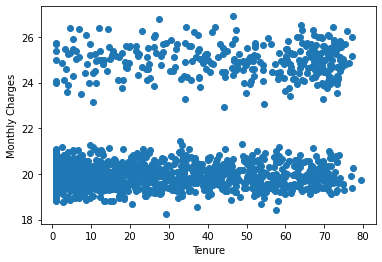

In [80]:
plt.scatter(new_x_2 , new_y_2)
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
# Weak correlation

# Use the employees database.
- Is there a relationship between how long an employee has been with the company and their salary?

In [90]:
query = '''
SELECT
    s.emp_no as emp_no,
    s.salary as salary,
    e.hire_date as hire_date,
    s.to_date as to_date
FROM salaries as s
JOIN employees as e USING (emp_no)
'''

In [92]:
salaries_df = pd.read_sql(query, url)

In [93]:
salaries_df.head(5)

,emp_no,salary,hire_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10001,62102,1986-06-26,1988-06-25
2,10001,66074,1986-06-26,1989-06-25
3,10001,66596,1986-06-26,1990-06-25
4,10001,66961,1986-06-26,1991-06-25


In [97]:
from datetime import date

In [108]:
#Change the value of to_date "9999-01-01" to current date 
salaries_df['to_date']= salaries_df['to_date'].replace(to_replace = salaries_df["to_date"].max(), value = date.today())

In [111]:
salaries_df['tenure_days'] = salaries_df["to_date"] - salaries_df["hire_date"]

In [114]:
salaries_df.head(20)

,emp_no,salary,hire_date,to_date,tenure_days
0,10001,60117,1986-06-26,1987-06-26,365 days
1,10001,62102,1986-06-26,1988-06-25,730 days
2,10001,66074,1986-06-26,1989-06-25,1095 days
3,10001,66596,1986-06-26,1990-06-25,1460 days
4,10001,66961,1986-06-26,1991-06-25,1825 days
5,10001,71046,1986-06-26,1992-06-24,2190 days
6,10001,74333,1986-06-26,1993-06-24,2555 days
7,10001,75286,1986-06-26,1994-06-24,2920 days
8,10001,75994,1986-06-26,1995-06-24,3285 days
9,10001,76884,1986-06-26,1996-06-23,3650 days


In [116]:
salaries_df['tenure_days'].astype # Checking the data type of tenure

<bound method NDFrame.astype of 0          365 days
1          730 days
2         1095 days
3         1460 days
4         1825 days
             ...   
2844042    365 days
2844043    730 days
2844044   1095 days
2844045   1460 days
2844046   8846 days
Name: tenure_days, Length: 2844047, dtype: timedelta64[ns]>

In [117]:
salaries_df['salary'].astype

<bound method NDFrame.astype of 0          60117
1          62102
2          66074
3          66596
4          66961
           ...  
2844042    63707
2844043    67043
2844044    70745
2844045    74327
2844046    77303
Name: salary, Length: 2844047, dtype: int64>

In [120]:
#Change tenure to string type first and then convert to int 
salaries_df["tenure_days"] = salaries_df.tenure_days.astype(str)

In [121]:
salaries_df["tenure_days"] = salaries_df.tenure_days.str.strip('days').astype(int)

In [122]:
r, p = stats.pearsonr(salaries_df.tenure_days, salaries_df.salary)
r, p

(0.30812733701373524, 0.0)

Text(0, 0.5, 'Salary')

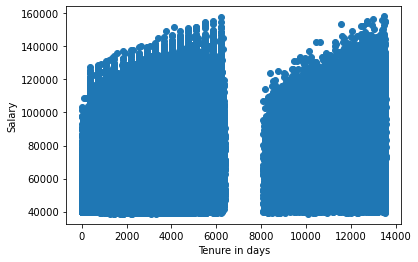

In [123]:
plt.scatter(salaries_df.tenure_days, salaries_df.salary)
plt.xlabel('Tenure in days')
plt.ylabel('Salary')
#There is weak correlation between the two

 - Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [125]:
query2 = '''
SELECT
    t.emp_no as emp_no,
    t.title as title,
    e.hire_date as hire_date,
    t.to_date as to_date
FROM titles as t
JOIN employees as e USING (emp_no)
'''

In [126]:
titles_df =  pd.read_sql(query2, url)

In [127]:
#Do same thing like salaries df
#change to_date to current date and change data type
titles_df['to_date']= titles_df['to_date'].replace(to_replace = titles_df["to_date"].max(), value = date.today())

In [128]:
titles_df['tenure_days'] = (titles_df.to_date - titles_df.hire_date)

In [131]:
titles_df["tenure_days"] = titles_df.tenure_days.astype(str)

In [132]:
titles_df["tenure_days"] = titles_df.tenure_days.str.strip('days').astype(int)

In [135]:
titles_df.head()

,emp_no,title,hire_date,to_date,tenure_days
0,10001,Senior Engineer,1986-06-26,2022-02-18,13021
1,10002,Staff,1985-11-21,2022-02-18,13238
2,10003,Senior Engineer,1986-08-28,2022-02-18,12958
3,10004,Engineer,1986-12-01,1995-12-01,3287
4,10004,Senior Engineer,1986-12-01,2022-02-18,12863


In [141]:
#Create a title series and tenure series by count the title in title_df
titles_series = titles_df.groupby('emp_no').count().title
tenure_series = titles_df.sort_values("to_date").groupby("emp_no").last()["tenure_days"]

In [142]:
r, p = stats.pearsonr(tenure_series, titles_series)
r, p

(0.34974211906440283, 0.0)

Text(0, 0.5, 'count Titles')

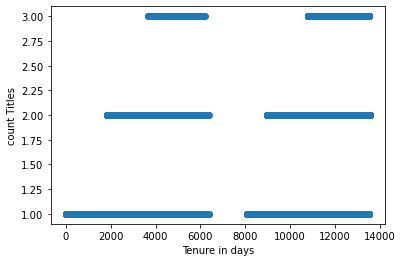

In [143]:
plt.scatter(tenure_series, titles_series)
plt.xlabel('Tenure in days')
plt.ylabel('count Titles')
#Have weak correlation

# Use the sleepstudy data. Is there a relationship between days and reaction time?

In [144]:
sleepstudy_df = data("sleepstudy")

In [148]:
sleepstudy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1 to 180
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reaction  180 non-null    float64
 1   Days      180 non-null    int64  
 2   Subject   180 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 5.6 KB


In [145]:
sleepstudy_df.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [146]:
#Learn more about sleep dataset
data('sleepstudy', show_doc='True')

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

In [152]:
x_days = sleepstudy_df.Days
y_rea = sleepstudy_df.Reaction

In [153]:
r, p = stats.pearsonr(x,y)
r, p

(0.5352302262650253, 9.894096322214812e-15)

Text(0, 0.5, 'Average reaction time (ms)')

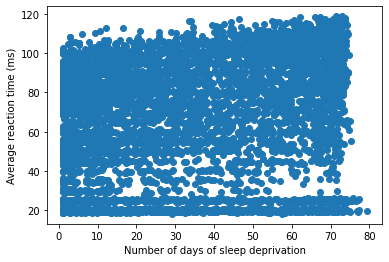

In [150]:
plt.scatter(x,y)
plt.xlabel("Number of days of sleep deprivation")
plt.ylabel("Average reaction time (ms)")